# OpenAI Function Calling with Python

[DeepLearning.AI Course Link](https://learn.deeplearning.ai/courses/functions-tools-agents-langchain/lesson/2/openai-function-calling)

## Introduction

Welcome to this Jupyter lab on OpenAI Function Calling! In this lab, we'll explore how to use OpenAI's API to call custom functions within language models. This powerful feature allows us to connect language models with external tools and APIs, enhancing their capabilities and making them more useful for real-world applications.

## Script Overview and Goals

1. Set up the environment (import libraries, load API key)
2. Define a dummy weather function to simulate an external API
3. Create a function definition for the OpenAI API
4. Send a user query to the OpenAI API with the function definition
5. Parse the API response and extract function call arguments
6. Demonstrate different function call modes (auto, none, forced)
7. Show how to use function responses in follow-up API calls

The main goals of this script are to:
- Demonstrate how to integrate custom functions with OpenAI's language models
- Showcase different function calling modes and their use cases
- Illustrate the process of using function outputs for more contextual responses

### Step 1. Set up the environment (import libraries, load API key)

In [3]:
%pip install -qU openai
%pip install -qU langchain
%pip install -qU pandas
%pip install -qU matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:


import os
import openai
import json

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())
openai.api_key = os.environ['OPENAI_API_KEY']


###   Step 2. Define a dummy weather function to simulate an external API 

In [5]:


def get_current_weather(location, unit="fahrenheit"):
    """ Get the current weather for a given location.
    
    This is an example dummy function hard-coded to return the same weather.
    
    Args:
        location (str): The location for which to get the weather, specified as a city name, postal code, or geographical coordinates.
        unit (str, optional): The unit of temperature to return the weather in. Can be "fahrenheit" or "celsius". Defaults to "fahrenheit".
    
    Returns:
        dict: A dictionary containing the current weather data, such as temperature, humidity, and description.
    """
    weather_info = {
        "location": location,
        "temperature": 72,
        "unit": unit,
        "forecast": ["sunny", "windy"]
    }
    return json.dumps(weather_info)

print(get_current_weather("boston"))

{"location": "boston", "temperature": 72, "unit": "fahrenheit", "forecast": ["sunny", "windy"]}


### Step 3. Create a function definition for the OpenAI API

In [6]:
functions = [
    {
        "name": "get_current_weather",
        "description": "Get the current weather in a given location",
        "parameters": {
            "type": "object",
            "properties": {
                "location": {
                    "type": "string",
                    "description": "The city and state, e.g. San Francisco, CA",
                },
                "unit": {"type": "string", "enum": ["celsius", "fahrenheit"]},
            },
            "required": ["location"],
        },
    }
]

### Step 4. Send a user query to the OpenAI API with the function definition

In [7]:


messages = [
    {
        "role": "user",
        "content": "What's the weather like in Boston?"
    }
]

response = openai.ChatCompletion.create(
    model="gpt-4o-mini",
    messages=messages,
    functions=functions
)

print(response)

APIRemovedInV1: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


### Step 5. Parse the API response and extract function call arguments

In [ ]:


# Print the entire response for debugging
print(response)

# Extract the message from the response
response_message = response["choices"][0]["message"]

# Print the entire message
print(response_message)

# Print just the content of the message (if any)
print(response_message["content"])

# Print the function call information
print(response_message["function_call"])

# Parse the function arguments from JSON string to Python dictionary
args = json.loads(response_message["function_call"]["arguments"])

print(args)
get_current_weather(args)

{
  "choices": [
    {
      "finish_reason": "function_call",
      "index": 0,
      "logprobs": null,
      "message": {
        "content": null,
        "function_call": {
          "arguments": "{\"location\":\"Boston, MA\"}",
          "name": "get_current_weather"
        },
        "refusal": null,
        "role": "assistant"
      }
    }
  ],
  "created": 1725169265,
  "id": "chatcmpl-A2XcfLSCZG1zLdf5PBtcx6j33wYz3",
  "model": "gpt-4o-mini-2024-07-18",
  "object": "chat.completion",
  "system_fingerprint": "fp_f33667828e",
  "usage": {
    "completion_tokens": 17,
    "prompt_tokens": 79,
    "total_tokens": 96
  }
}
{
  "content": null,
  "function_call": {
    "arguments": "{\"location\":\"Boston, MA\"}",
    "name": "get_current_weather"
  },
  "refusal": null,
  "role": "assistant"
}
None
{
  "arguments": "{\"location\":\"Boston, MA\"}",
  "name": "get_current_weather"
}
{'location': 'Boston, MA'}


'{"location": {"location": "Boston, MA"}, "temperature": 72, "unit": "fahrenheit", "forecast": ["sunny", "windy"]}'

### Step 6. Demonstrate different function call modes (auto, none, forced)

See the included examples of various behaviours of function calling.

Running examples to demonstrate different function calling scenarios...

Available Functions:
[
  {
    "name": "get_current_weather",
    "description": "Get the current weather in a given location",
    "parameters": {
      "type": "object",
      "properties": {
        "location": {
          "type": "string",
          "description": "The city and state, e.g. San Francisco, CA"
        },
        "unit": {
          "type": "string",
          "enum": [
            "celsius",
            "fahrenheit"
          ]
        }
      },
      "required": [
        "location"
      ]
    }
  }
]

Summary of All Examples:


,Prompt,Content,Function Call
Scenario,,,
Default behavior,What's the weather like in New York?,None,"{\n ""name"": ""get_current_weather"",\n ""arguments"": ""{\""location\"":\""New York, NY\""}""\n}"
Automatic function calling,What's the temperature in Los Angeles?,None,"{\n ""name"": ""get_current_weather"",\n ""arguments"": ""{\""location\"":\""Los Angeles, CA\""}""\n}"
Prevent function calls,What's the weather in Boston?,Which unit would you prefer for the temperature: Celsius or Fahrenheit?,"""None"""
Force weather function,hi!,None,"{\n ""name"": ""get_current_weather"",\n ""arguments"": ""{\""location\"":\""New York, NY\""}""\n}"
Multiple functions,What's the weather and time in Chicago?,None,"{\n ""name"": ""get_current_weather"",\n ""arguments"": ""{\""location\"":\""Chicago, IL\""}""\n}"



Detailed Results:

Default behavior:
  Description: No specific function call setting, allowing the model to decide.
  Prompt: What's the weather like in New York?
  Message to Model: [
  {
    "role": "user",
    "content": "What's the weather like in New York?"
  }
]
  Model Response: None
  Function Call: {
  "name": "get_current_weather",
  "arguments": "{\"location\":\"New York, NY\"}"
}
  Token Usage: 98 (Prompt: 80, Completion: 18)

Automatic function calling:
  Description: Explicitly allowing the model to call functions if it deems necessary.
  Prompt: What's the temperature in Los Angeles?
  Message to Model: [
  {
    "role": "user",
    "content": "What's the temperature in Los Angeles?"
  }
]
  Model Response: None
  Function Call: {
  "name": "get_current_weather",
  "arguments": "{\"location\":\"Los Angeles, CA\"}"
}
  Token Usage: 97 (Prompt: 79, Completion: 18)

Prevent function calls:
  Description: Explicitly preventing the model from calling any functions.
  Prompt

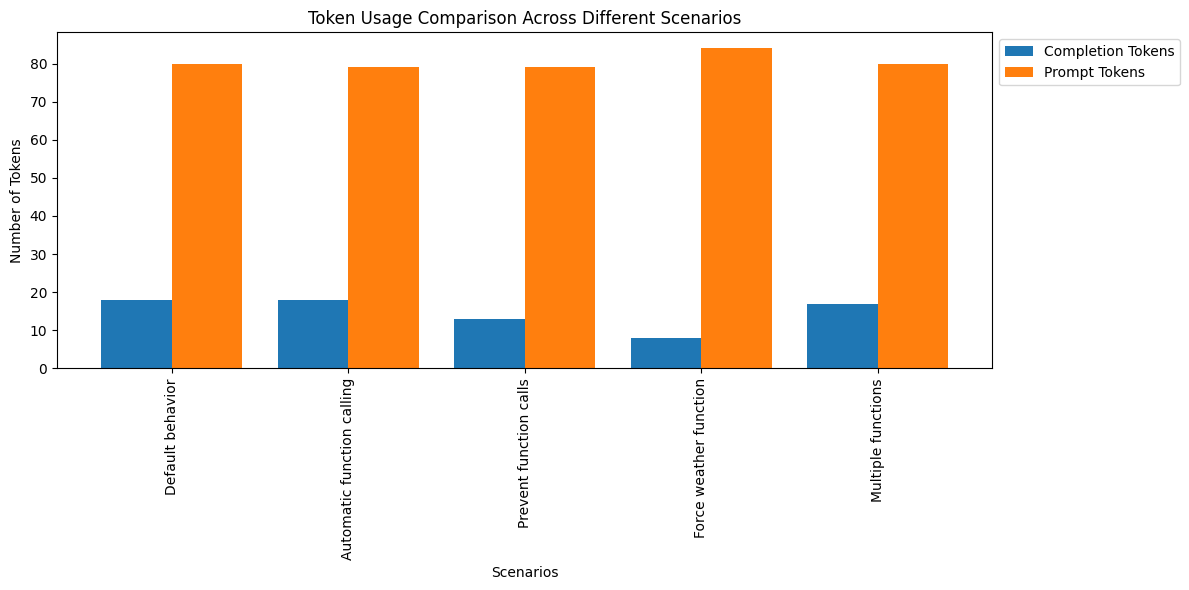

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

def format_json(json_str):
    try:
        return json.dumps(json.loads(json_str), indent=2)
    except:
        return json_str

def get_structured_response(response, prompt):
    message = response['choices'][0]['message']
    structured_data = {
        "Prompt": prompt,
        "Model": response['model'],
        "Completion Tokens": response['usage']['completion_tokens'],
        "Prompt Tokens": response['usage']['prompt_tokens'],
        "Total Tokens": response['usage']['total_tokens'],
        "Role": message['role'],
        "Content": message.get('content', 'None'),
        "Function Call": format_json(json.dumps(message.get('function_call', 'None')))
    }
    return structured_data

def run_example(scenario, content, extra_params={}):
    messages = [{"role": "user", "content": content}]
    response = openai.ChatCompletion.create(
        model="gpt-4o-mini",
        messages=messages,
        functions=functions,
        **extra_params
    )
    return get_structured_response(response, content)

def run_all_examples():
    scenarios = [
        ("Default behavior", "What's the weather like in New York?", {}, 
         "No specific function call setting, allowing the model to decide."),
        ("Automatic function calling", "What's the temperature in Los Angeles?", {"function_call": "auto"}, 
         "Explicitly allowing the model to call functions if it deems necessary."),
        ("Prevent function calls", "What's the weather in Boston?", {"function_call": "none"}, 
         "Explicitly preventing the model from calling any functions."),
        ("Force weather function", "hi!", {"function_call": {"name": "get_current_weather"}}, 
         "Forcing the model to call the weather function, even with an irrelevant prompt."),
        ("Multiple functions", "What's the weather and time in Chicago?", {"function_call": "auto"}, 
         "Testing how the model chooses between multiple available functions.")
    ]
    
    results = []
    for scenario, content, extra_params, description in scenarios:
        result = run_example(scenario, content, extra_params)
        result['Scenario'] = scenario
        result['Description'] = description
        results.append(result)
    
    df = pd.DataFrame(results)
    df.set_index('Scenario', inplace=True)
    return df


def visualize_token_usage(df):
    token_data = df[['Completion Tokens', 'Prompt Tokens']]
    ax = token_data.plot(kind='bar', figsize=(12, 6), width=0.8)
    plt.title('Token Usage Comparison Across Different Scenarios')
    plt.ylabel('Number of Tokens')
    plt.xlabel('Scenarios')
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.show()

# Run all examples and display results
print("Running examples to demonstrate different function calling scenarios...")
all_results_df = run_all_examples()

print("\nAvailable Functions:")
print(json.dumps(functions, indent=2))

print("\nSummary of All Examples:")
summary_df = all_results_df[['Prompt', 'Content', 'Function Call']]
pd.set_option('display.max_colwidth', None)
display(summary_df)

print("\nDetailed Results:")
for scenario in all_results_df.index:
    print(f"\n{scenario}:")
    scenario_data = all_results_df.loc[scenario]
    print(f"  Description: {scenario_data['Description']}")
    print(f"  Prompt: {scenario_data['Prompt']}")
    print(f"  Message to Model: {json.dumps([{'role': 'user', 'content': scenario_data['Prompt']}], indent=2)}")
    print(f"  Model Response: {scenario_data['Content']}")
    print(f"  Function Call: {scenario_data['Function Call']}")
    print(f"  Token Usage: {scenario_data['Total Tokens']} (Prompt: {scenario_data['Prompt Tokens']}, Completion: {scenario_data['Completion Tokens']})")

print("\nVisualizing token usage across scenarios:")
visualize_token_usage(all_results_df)

### Step 7. Show how to use function responses in follow-up API calls
It is important to note that function calls are also included in your token limits.

In [ ]:


messages = [
    {
        "role": "user",
        "content": "What's the weather like in Boston!",
    }
]
response = openai.ChatCompletion.create(
    model="gpt-4o-mini",
    messages=messages,
    functions=functions,
    function_call={"name": "get_current_weather"},
)
print(response)

messages.append(response["choices"][0]["message"])


args = json.loads(response["choices"][0]["message"]['function_call']['arguments'])
observation = get_current_weather(args)

messages.append(
        {
            "role": "function",
            "name": "get_current_weather",
            "content": observation,
        }
)

response = openai.ChatCompletion.create(
    model="gpt-4o-mini",
    messages=messages,
)
print(response)

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "message": {
        "content": null,
        "function_call": {
          "arguments": "{\"location\":\"Boston, MA\"}",
          "name": "get_current_weather"
        },
        "refusal": null,
        "role": "assistant"
      }
    }
  ],
  "created": 1725170217,
  "id": "chatcmpl-A2Xs1XaVVQUrHOUaZhORglBgP8qSv",
  "model": "gpt-4o-mini-2024-07-18",
  "object": "chat.completion",
  "system_fingerprint": "fp_f33667828e",
  "usage": {
    "completion_tokens": 7,
    "prompt_tokens": 89,
    "total_tokens": 96
  }
}
{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "message": {
        "content": "The weather in Boston, MA is currently 72\u00b0F and sunny, with some wind.",
        "refusal": null,
        "role": "assistant"
      }
    }
  ],
  "created": 1725170219,
  "id": "chatcmpl-A2Xs3Dj4r4kgTDqWw0UXEXSV5tNpa",
  "model": "gpt